In [15]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Garbage

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate values for x and y such that x + y = 1
x_values = np.linspace(0, 1, 100)
y_values = 1 - x_values

# Calculate the scatter points
scatter_x = x_values * 0.1 + y_values * 0.2
scatter_y = x_values * 0.1 + y_values * 0.2

# Plot the line and scatter points
fig, ax = plt.subplots()
ax.plot(label="x + y = 1")
scatter = ax.scatter(scatter_x, scatter_y, c='orange', label="Scatter Points",s = 10)

# Add labels and legend
ax.set_xlabel("Standard Deviation")
ax.set_ylabel("Mean Return")
ax.grid(True)
plt.title("Line and Scatter Points for x + y = 1")
plt.show()

# Functions

In [ ]:
'''
    Example from book p. 98
     - SHORT SALES ALLOWED WITH RISKLESS LENDING AND BORROWING

    mu : expected returns
    sigma : standard deviations
    RF : risk-free rate
    cor : Correlation matrix
'''
def calculate_optimal_weights(mu : np.array, sigma : np.array, RF : float, cor : np.array, print_ = False) -> np.array:
    # Covariance matrix
    C = np.diag(sigma) @ cor @ np.diag(sigma)


    # Construct matrix A
    A = 2 * C
    A = np.hstack((A, -(mu - RF).reshape(-1, 1)))
    last_row = np.hstack(((mu - RF).reshape(1, -1), [[0]]))
    A = np.vstack((A, last_row))

    # Define b
    Rp = 0.1
    b = np.zeros(len(mu) + 1)
    b[-1] = Rp - RF

    # Solve for x
    x = np.linalg.inv(A) @ b

    # Optimal portfolio weights
    number_of_assets = len(mu)
    xopt = x[:number_of_assets] / np.sum(x[:number_of_assets])

    if print_:
        print("Covariance matrix:\n", C)
        print("Matrix A:\n", A)
        print("Vector b:", b)
        print("Optimal weights:", xopt)
    return xopt

# Test code with example from book
#   -> The answer is verified to be correct ie. the same as in the book
mu = np.array([0.14, 0.08, 0.2]) # Expected returns
RF = 0.05 # Risk-free rate

sigma = np.array([0.06, 0.03, 0.15]) # Standard deviations
cov = np.array([[1, 0.5, 0.2],
              [0.5, 1, 0.4],
              [0.2, 0.4, 1]]) # Correlation matrix


calculate_optimal_weights(mu, sigma, RF, cov, print_ = True)

Covariance matrix:
 [[0.0036 0.0009 0.0018]
 [0.0009 0.0009 0.0018]
 [0.0018 0.0018 0.0225]]
Matrix A:
 [[ 0.0072  0.0018  0.0036 -0.09  ]
 [ 0.0018  0.0018  0.0036 -0.03  ]
 [ 0.0036  0.0036  0.045  -0.15  ]
 [ 0.09    0.03    0.15    0.    ]]
Vector b: [0.   0.   0.   0.05]
Optimal weights: [0.77777778 0.05555556 0.16666667]


array([0.77777778, 0.05555556, 0.16666667])

 # Task 1.1

In [ ]:
print("Optimal weights for cov(x_1, x_2) = 1")
opt_1 = calculate_optimal_weights(
    mu = np.array([0.1, 0.2]), 
    sigma = np.array([0.1, 0.2]), 
    RF = 0.02, 
    cor = np.array([[1, 1],
                    [1, 1]])
)
print(opt_1, "\n")

print("Optimal weights for cov(x_1, x_2) = .5")
opt_2 =calculate_optimal_weights(
    mu = np.array([0.1, 0.2]), 
    sigma = np.array([0.1, 0.2]), 
    RF = 0.02, 
    cor = np.array([[1, .5],
                    [.5, 1]])
)
print(opt_2, "\n")

print("Optimal weights for cov(x_1, x_2) = 0")
opt_3 = calculate_optimal_weights(
    mu = np.array([0.1, 0.2]), 
    sigma = np.array([0.1, 0.2]), 
    RF = 0.02, 
    cor = np.array([[1, 0],
                    [0, 1]])
)
print(opt_3, "\n")

print("Optimal weights for cov(x_1, x_2) = -1")
opt_4 = calculate_optimal_weights(
    mu = np.array([0.1, 0.2]), 
    sigma = np.array([0.1, 0.2]), 
    RF = 0.02, 
    cor = np.array([[1, -1],
                    [-1, 1]])
)
print(opt_4, "\n")


Optimal weights for cov(x_1, x_2) = 1
[ 2. -1.] 

Optimal weights for cov(x_1, x_2) = .5
[0.58333333 0.41666667] 

Optimal weights for cov(x_1, x_2) = 0
[0.64 0.36] 

Optimal weights for cov(x_1, x_2) = 1
[0.66666667 0.33333333] 



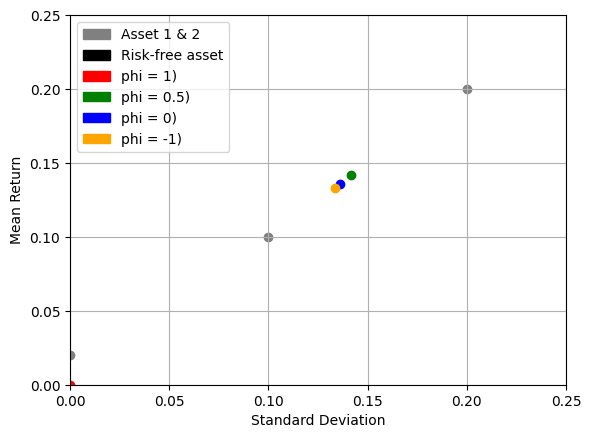

In [55]:
fig, ax = plt.subplots()
ax.set_xlim(0, 0.25)  # Set x-axis limits
ax.set_ylim(0, 0.25)  # Set x-axis limits

scattter = ax.scatter(.10, .10, c='grey')  # Asset 1
scattter = ax.scatter(.20, .20, c='grey')  # Asset 2
scattter = ax.scatter(0, .02, c='grey')   # Risk-free asset

''' Portefolio 1 (cov(x_1, x_2) = 1)
    Optial weights : [2, -1]
    Point : (0,0)

    TODO: Not sure this is correct
    Point is at (0,0) which makes sense since there is no risk in the portfolio
    But we also shorten the second assets which means: 
        If assets one goes well : We get 2 * 10% of asset 1 and -1 * 20% of asset 2
'''
scattter = ax.scatter(opt_1[0] * .1 + opt_1[1] * .2, opt_1[0] * .1 + opt_1[1] * .2, c='red')  # Optimal portfolio

''' Portefolio 2 (cov(x_1, x_2) = .5)
    Optial weights : [0.58 0.42] 
    Point : (0.14, 0.14)
'''
scattter = ax.scatter(opt_2[0] * .1 + opt_2[1] * .2, opt_2[0] * .1 + opt_2[1] * .2, c='green')  # Optimal portfolio

''' Portefolio 3 (cov(x_1, x_2) = 0)
    Optial weights : [0.64 0.36] 
    Point : (0.136 0.136)

    TODO : There must be a reason why we use approx 2/3 of the first asset and approx 1/3 of the second when there is no correlation
'''
scattter = ax.scatter(opt_3[0] * .1 + opt_3[1] * .2, opt_3[0] * .1 + opt_3[1] * .2, c='blue')  # Optimal portfolio

''' Portefolio 4 (cov(x_1, x_2) = -1)
    Optial weights : [0.67 0.33]
    Point : (0.133, 0.133)

    TODO : Not sure why we use 2/3 of the first asset and 1/3 of the second when they are negatively correlated
'''
scattter = ax.scatter(opt_4[0] * .1 + opt_4[1] * .2, opt_4[0] * .1 + opt_4[1] * .2, c='orange')  # Optimal portfolio

# Add legend
legend_patches = [
    mpatches.Patch(color='grey', label='Asset 1 & 2'),
    mpatches.Patch(color='black', label='Risk-free asset'),
    mpatches.Patch(color='red', label='phi = 1)'),
    mpatches.Patch(color='green', label='phi = 0.5)'),
    mpatches.Patch(color='blue', label='phi = 0)'),
    mpatches.Patch(color='orange', label='phi = -1)')
]
ax.legend(handles=legend_patches)
ax.set_xlabel("Standard Deviation")
ax.set_ylabel("Mean Return")
ax.grid(True)

plt.show()


1.0 2.0816681711721685e-17


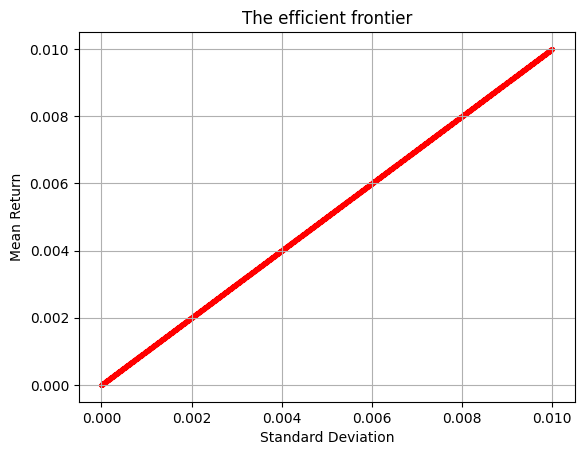

In [77]:
'''
     We find the efficient frontier by fitting a linear regression model to the optimal portfolios
     TODO : Is this an optimal way to find the efficient frontier? - Maybe we need the risk-free rate to solve this
'''

fig, ax = plt.subplots()

# Fit linear regression model
x = [opt_1[0] * .1 + opt_1[1] * .2,
     opt_2[0] * .1 + opt_2[1] * .2,
     opt_3[0] * .1 + opt_3[1] * .2,
     opt_4[0] * .1 + opt_4[1] * .2]

y = [opt_1[0] * .1 + opt_1[1] * .2,
     opt_2[0] * .1 + opt_2[1] * .2,
     opt_3[0] * .1 + opt_3[1] * .2,
     opt_4[0] * .1 + opt_4[1] * .2]

slope, intercept = np.polyfit(x, y, 1)
if 1 : print(slope, intercept)

# Plot the line and scatter points
x_fit = np.linspace(0, 0.01, 10000)
y_fit = slope * x_fit + intercept

scatter = ax.scatter(x_fit, y_fit, c='red', s = 5)

ax.set_xlabel("Standard Deviation")
ax.set_ylabel("Mean Return")
ax.grid(True)
plt.title("The efficient frontier")
plt.show()